In [3]:
!pip install -r ../requirements.txt



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def choose_year(df, year:int, semester=None):
    if semester == None:
        if year == 1:
            df = df.iloc[:10]
        elif year == 2:
            df = df.iloc[10:20]
        elif year == 3:
            df = df.iloc[20:30]
        else:
            df = df.iloc[30:40]
    else:
        if year == 1 and semester == 1:
            df = df.iloc[:5]
        elif year == 1 and semester == 2:
            df = df.iloc[5:10]
        elif year == 2 and semester == 1:
            df = df.iloc[10:15]
        elif year == 2 and semester == 2:
            df = df.iloc[15:20]
        elif year == 2 and semester == 1:
            df = df.iloc[20:25]
        elif year == 2 and semester == 2:
            df = df.iloc[25:30]
        elif year == 2 and semester == 1:
            df = df.iloc[30:35]
        else:
            df = df.iloc[35:40]
    return df

In [12]:
def marks_by_subject(df, x_string, y_string, join_string, year:int, type_graph="bars", semester=None):
    df_subset = choose_year(df, year, semester)

    x = df_subset[x_string]
    y = pd.to_numeric(df_subset[y_string], errors='coerce')
    fields = df_subset[join_string]

    unique_fields = fields.unique()
    colors = sns.color_palette("husl", len(unique_fields))  
    field_color_map = dict(zip(unique_fields, colors))
    bar_colors = fields.map(field_color_map)
    
    fig, ax = plt.subplots()

    if(type_graph == "bars"):
        ax.bar(x, y, color=bar_colors)
        handles = [plt.Rectangle((0,0),1,1, color=field_color_map[field]) for field in unique_fields]
    elif(type_graph == "lines"):
        ax.plot(x, y, marker='o', linestyle='-', color='b', alpha=0.5)  
        for i, (subject, mark, color) in enumerate(zip(x, y, bar_colors)):
            ax.plot(subject, mark, marker='o', color=color, markersize=8)
        handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, linestyle='') for color in colors]

    ax.set_ylim(0, 10)
    ax.set_ylabel(y_string)
    if semester == None:
        ax.set_title('Marks by Subject Year ' + str(year))
    else:
        ax.set_title('Marks by Subject Year ' + str(year) + ' and Semester ' + str(semester))
    plt.xticks(rotation=45, ha='right', rotation_mode='default')

    ax.legend(handles, unique_fields, title=join_string)

    fig.tight_layout()
    plt.show()

In [6]:
df = pd.read_excel('dataset.xlsx')

In [7]:
print(df)

                   Subject  Year Mark          Field   MH Repeated  Credits  \
0                 Calculus     1  7.5           Math   No       No        6   
1                   Fisics     1  7.7         Fisics   No       No        6   
2              Electronics     1  7.8         Fisics   No       No        6   
3            Programming 1     1  7.2    Programming   No       No        6   
4            Discrete Math     1  7.7           Math   No       No        6   
5                  Algebra     1    8           Math   No       No        6   
6               Statistics     1  7.5           Math   No       No        6   
7                 Business     1  9.1          Extra   No       No        6   
8                      OOP     1  9.5    Programming   No       No        6   
9      Computer Technology     1   10       Hardware   No       No        6   
10              Algorithms     2   10    Programming  Yes       No        6   
11               Databases     2  8.7    Programming

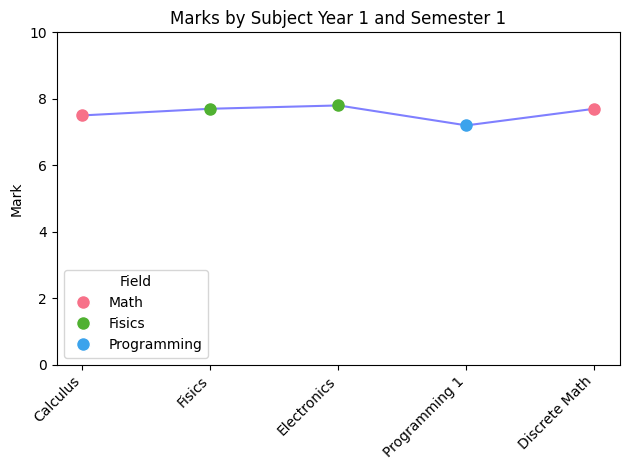

In [13]:
marks_by_subject(df, "Subject", "Mark", "Field", 1, type_graph="lines", semester=1)

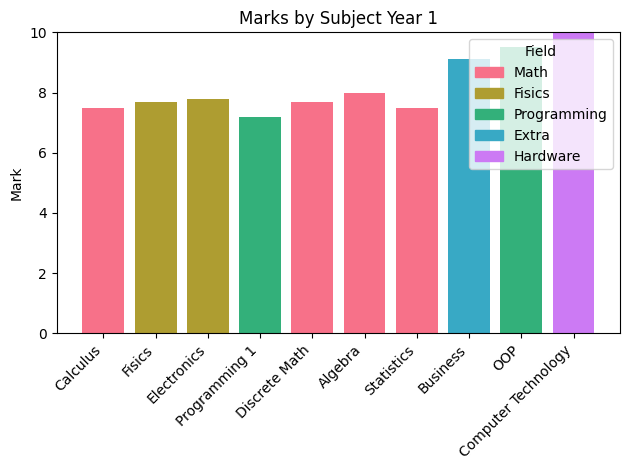

In [14]:
marks_by_subject(df, "Subject", "Mark", "Field", 1, type_graph="bars")

In [11]:
def mean_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    mean_column = pd.to_numeric(df_subset['Mark'], errors='coerce').mean()
    return mean_column

In [59]:
mean_year1 = mean_year(df, 1)
mean_year2 = mean_year(df, 2)
mean_year3 = mean_year(df, 3)
mean_year4 = mean_year(df, 4)
means = [mean_year1, mean_year2, mean_year3, mean_year4]
mean_expedient = pd.to_numeric(df['Mark'], errors='coerce').mean()

In [60]:
print(means)
print(mean_expedient)

[np.float64(8.2), np.float64(8.790000000000001), np.float64(8.54), np.float64(9.0)]
8.525806451612903


In [67]:
def median_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    median_column = pd.to_numeric(df_subset['Mark'], errors='coerce').median()
    return median_column

In [62]:
median_year1 = median_year(df, 1)
median_year2 = median_year(df, 2)
median_year3 = median_year(df, 3)
median_year4 = median_year(df, 4)
medians = [median_year1, median_year2, median_year3, median_year4]
median_expedient = pd.to_numeric(df['Mark'], errors='coerce').median()

In [63]:
print(medians)
print(median_expedient)

[np.float64(7.75), np.float64(8.899999999999999), np.float64(8.35), np.float64(9.0)]
8.3


In [68]:
def mode_year(df, year:int, semester=None):
    df_subset = choose_year(df, year, semester)
    mode_column = pd.to_numeric(df_subset['Mark'], errors='coerce').mode()
    return mode_column

In [70]:
mode_year1 = mode_year(df, 1)
mode_year2 = mode_year(df, 2)
mode_year3 = mode_year(df, 3)
mode_year4 = mode_year(df, 4)
#modes = [mode_year1, mode_year2, mode_year3, mode_year4]
mode_expedient = pd.to_numeric(df['Mark'], errors='coerce').mode()

In [79]:
print(mode_year1.values)
print()
print(mode_year2.values)
print()
print(mode_year3.values)
print()
print(mode_year4.values)
print()
print(mode_expedient.values)

[7.5 7.7]

[10.]

[9.]

[9.]

[ 9. 10.]
